<a href="https://colab.research.google.com/github/sherna90/mineria_datos/blob/master/2-feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering

# Tarea

En este laboratorio Ud debe completar las siguientes tareas:


1.   Implementar un modelo base para predecir la variable 'nuevos casos por millon de habitantes' usando las tasas de movilidad.
2.   Reportar la metrica de ajuste del modelo base.
3. Reportar la metrica de ajuste del modelo usando feature engineering.


In [73]:
# Analisis Exploratorio de Casos COVID 
import pandas as pd

data=pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv')


In [74]:
data['Region'] = data['Region'].astype('category')
data['Comuna'] = data['Comuna'].astype('category')
data['Codigo comuna'] = data['Codigo comuna'].astype('category')
data['Codigo region'] = data['Codigo region'].astype('category')

In [169]:
data_maule=data[data.Region=='Maule']

In [170]:
data_maule[data_maule.Comuna=='Talca'].head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,2020-04-20,2020-04-24,2020-04-27,2020-05-01,2020-05-04,2020-05-08,2020-05-11,2020-05-15,2020-05-18,2020-05-22,2020-05-25,2020-05-29,2020-06-01,2020-06-05,2020-06-08,2020-06-12,2020-06-15,2020-06-19,2020-06-23,2020-06-28,2020-07-01,2020-07-05,2020-07-10,2020-07-13,2020-07-17,2020-07-20,...,2021-01-29,2021-02-01,2021-02-05,2021-02-08,2021-02-12,2021-02-15,2021-02-19,2021-02-22,2021-02-26,2021-03-01,2021-03-05,2021-03-08,2021-03-12,2021-03-15,2021-03-19,2021-03-22,2021-03-26,2021-03-29,2021-04-02,2021-04-05,2021-04-09,2021-04-12,2021-04-16,2021-04-19,2021-04-23,2021-04-26,2021-04-30,2021-05-03,2021-05-07,2021-05-10,2021-05-14,2021-05-17,2021-05-21,2021-05-24,2021-05-28,2021-05-31,2021-06-04,2021-06-07,2021-06-11,Tasa
200,Maule,7,Talca,7101.0,236724.0,34.0,37.0,42.0,48.0,51.0,51.0,51.0,57.0,91.0,133.0,145.0,149.0,160.0,162.0,163.0,166.0,191.0,203.0,247.0,283.0,311.0,329.0,392.0,433.0,530.0,607.0,762.0,939.0,1154.0,1239.0,1392.0,1565.0,1635.0,1710.0,1755.0,...,7868.0,8163.0,8477.0,8747.0,8968.0,9172.0,9319.0,9503.0,9735.0,9987.0,10302.0,10580.0,10977.0,11296.0,11676.0,12023.0,12449.0,12746.0,13123.0,13403.0,13737.0,14058.0,14335.0,14547.0,14719.0,14885.0,15109.0,15310.0,15579.0,15801.0,16111.0,16399.0,16809.0,17068.0,17504.0,17851.0,18275.0,18602.0,18978.0,8016.9


In [171]:
data_maule.drop(columns=['Region','Codigo region','Codigo comuna'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [194]:
data_maule_tabla=data_maule.melt(id_vars=['Comuna', 'Poblacion','Tasa'], 
        var_name='Fecha', 
        value_name='Casos')

In [195]:
data_maule_tabla['Fecha'] = pd.to_datetime(data_maule_tabla['Fecha'],format='%Y/%m/%d')

In [196]:
data_maule_tabla[data_maule_tabla.Comuna=='Talca'].sort_values('Fecha').head(10)

,Comuna,Poblacion,Tasa,Fecha,Casos
25,Talca,236724.0,8016.9,2020-03-30,34.0
56,Talca,236724.0,8016.9,2020-04-01,37.0
87,Talca,236724.0,8016.9,2020-04-03,42.0
118,Talca,236724.0,8016.9,2020-04-06,48.0
149,Talca,236724.0,8016.9,2020-04-08,51.0
180,Talca,236724.0,8016.9,2020-04-10,51.0
211,Talca,236724.0,8016.9,2020-04-13,51.0
242,Talca,236724.0,8016.9,2020-04-15,57.0
273,Talca,236724.0,8016.9,2020-04-17,91.0
304,Talca,236724.0,8016.9,2020-04-20,133.0


In [198]:
poblacion_maule=data.groupby('Region')['Poblacion'].sum()['Maule']

Text(0.5, 1.0, 'Casos confirmados Maule')

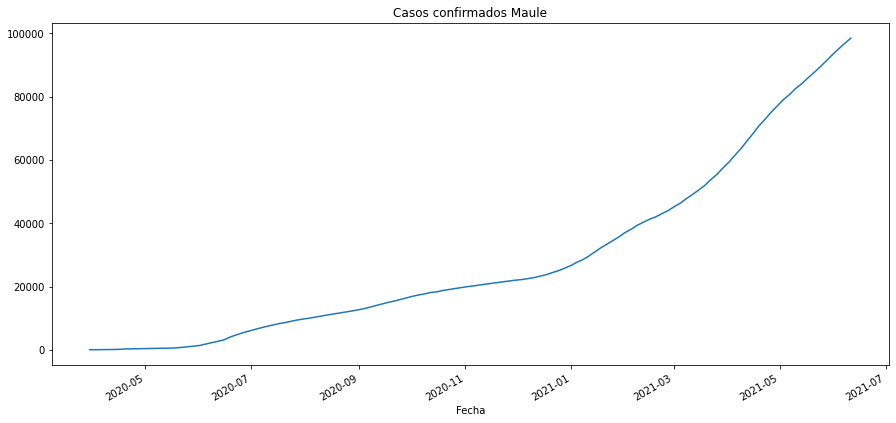

In [252]:
import matplotlib.pyplot as plt

grouped_data_maule=data_maule_tabla.groupby('Fecha')['Casos'].sum()
grouped_data_maule.plot(figsize=(15,7))
plt.title('Casos confirmados Maule')

In [234]:
prevalencia_maule=grouped_data_maule.diff()/poblacion_maule

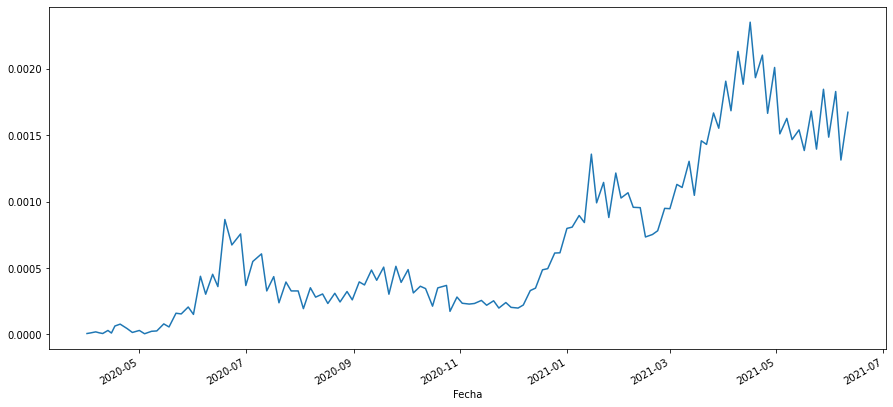

In [251]:
prevalencia_maule.plot(figsize=(15,7))

In [103]:
def get_mobility_data():
    data=pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=5a11e4fc1b8138c6')
    return data

mobility_report=get_mobility_data()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [104]:
mobility_report.dtypes

country_region_code                                    object
country_region                                         object
sub_region_1                                           object
sub_region_2                                           object
metro_area                                             object
iso_3166_2_code                                        object
census_fips_code                                      float64
place_id                                               object
date                                                   object
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

In [105]:
mobility_report['date']=pd.to_datetime(mobility_report['date'],format='%Y/%m/%d')
mobility_report['country_region_code'] = mobility_report['country_region_code'].astype('category')
mobility_report['country_region'] = mobility_report['country_region'].astype('category')
mobility_report['iso_3166_2_code'] = mobility_report['iso_3166_2_code'].astype('category')
mobility_report['sub_region_1'] = mobility_report['sub_region_1'].astype('category')
mobility_report['sub_region_2'] = mobility_report['sub_region_2'].astype('category')
mobility_report.drop(['census_fips_code','iso_3166_2_code','place_id','metro_area'],axis=1,inplace=True)

In [112]:
mobility_chile=mobility_report.loc[mobility_report.country_region=='Chile'].copy()
mobility_chile.set_index('date',inplace=True)
mobility_chile.sort_index(inplace=True)

In [119]:
mobility_maule=mobility_chile[mobility_chile.sub_region_1=='Maule']

In [123]:
mobility_maule=mobility_maule.groupby('date').mean()

In [206]:
df_maule=pd.merge(prevalencia_maule,mobility_maule, left_index=True, right_index=True)

In [207]:
df_maule.dtypes

Casos                                                 float64
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

In [208]:
df_maule['Casos']

2020-03-30         NaN
2020-04-01    0.000006
2020-04-03    0.000011
2020-04-06    0.000019
2020-04-08    0.000011
                ...   
2021-05-28    0.001846
2021-05-31    0.001485
2021-06-04    0.001829
2021-06-07    0.001313
2021-06-11    0.001672
Name: Casos, Length: 128, dtype: float64

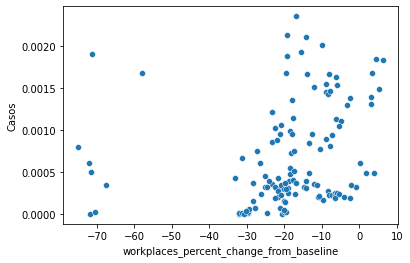

In [209]:
import seaborn as sns

sns.scatterplot(x="workplaces_percent_change_from_baseline", y="Casos", data=df_maule)


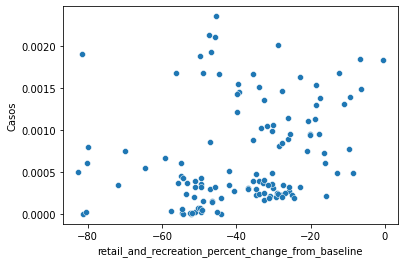

In [210]:
sns.scatterplot(x="retail_and_recreation_percent_change_from_baseline", y="Casos", data=df_maule)


In [211]:
df_maule.tail()

,Casos,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2021-05-28,0.001846,-6.6,15.00,-27.2,30.75,4.4,15.0
2021-05-31,0.001485,-6.4,13.50,-22.4,32.50,5.2,12.8
2021-06-04,0.001829,-0.6,23.50,-22.6,43.50,6.2,14.2
2021-06-07,0.001313,-11.0,10.25,-22.2,23.50,3.0,14.4
2021-06-11,0.001672,-12.4,12.00,-28.2,22.25,3.4,16.2


In [213]:
df_maule['Casos'].isna().sum()

1

In [216]:
df_maule.dropna(inplace=True)

In [236]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

y=df_maule['Casos'].values
X=df_maule[df_maule.columns.difference(['Casos'])].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = ElasticNet(normalize=False,fit_intercept=True).fit(X_train, y_train)
y_hat=model.predict(X_test)
print('Coeficiente de Determinacion R2 Modelo Base: {0:0.2f}'.format(reg.score(X_test,y_test)))
print('MAE Modelo Base: {0:0.2f}'.format(mean_absolute_error(y_test,y_hat)))
print('% Varianza Explicada  Modelo Base: {0:0.2f}'.format(explained_variance_score(y_test,y_hat)))

Coeficiente de Determinacion R2 Modelo Base: -0.01
MAE Modelo Base: 0.00
% Varianza Explicada  Modelo Base: 0.00


In [238]:
from sklearn.preprocessing import PolynomialFeatures

def train_poly(X,y,p=8,interaction=True):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
  for k in range(2,p):
    poly = PolynomialFeatures(k,interaction_only=interaction)
    poly.fit(X_train)
    X_train_p2=poly.transform(X_train)
    X_test_p2=poly.transform(X_test)

    model = ElasticNet(normalize=False,fit_intercept=True).fit(X_train_p2, y_train)
    y_hat_p2=model.predict(X_test_p2)
    print('Coeficiente de Determinacion R2 Polinomio ({0}) : {1:0.2f}'.format(k,model.score(X_test_p2,y_test)))
    print('-----------------------------------------------------')

train_poly(X,y,p=5,interaction=False)

Coeficiente de Determinacion R2 Polinomio (2) : -0.01
MAE Polinomio (2) : 0.00
% Varianza Explicada  Polinomio (2) : 0.00
-----------------------------------------------------
Coeficiente de Determinacion R2 Polinomio (3) : 0.40
MAE Polinomio (3) : 0.00
% Varianza Explicada  Polinomio (3) : 0.40
-----------------------------------------------------
Coeficiente de Determinacion R2 Polinomio (4) : -4.74
MAE Polinomio (4) : 0.00
% Varianza Explicada  Polinomio (4) : -4.44
-----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.152189263608288e-08, tolerance: 3.0811780339356063e-09
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.897982857598068e-06, tolerance: 3.0811780339356063e-09
  positive)


In [239]:
train_poly(X,y,p=6,interaction=True)

Coeficiente de Determinacion R2 Polinomio (2) : -0.01
MAE Polinomio (2) : 0.00
% Varianza Explicada  Polinomio (2) : 0.00
-----------------------------------------------------
Coeficiente de Determinacion R2 Polinomio (3) : 0.48
MAE Polinomio (3) : 0.00
% Varianza Explicada  Polinomio (3) : 0.48
-----------------------------------------------------
Coeficiente de Determinacion R2 Polinomio (4) : -0.08
MAE Polinomio (4) : 0.00
% Varianza Explicada  Polinomio (4) : -0.06
-----------------------------------------------------
Coeficiente de Determinacion R2 Polinomio (5) : -0.37
MAE Polinomio (5) : 0.00
% Varianza Explicada  Polinomio (5) : -0.33
-----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.7355167816579565e-06, tolerance: 3.0811780339356063e-09
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.163680417401187e-06, tolerance: 3.0811780339356063e-09
  positive)


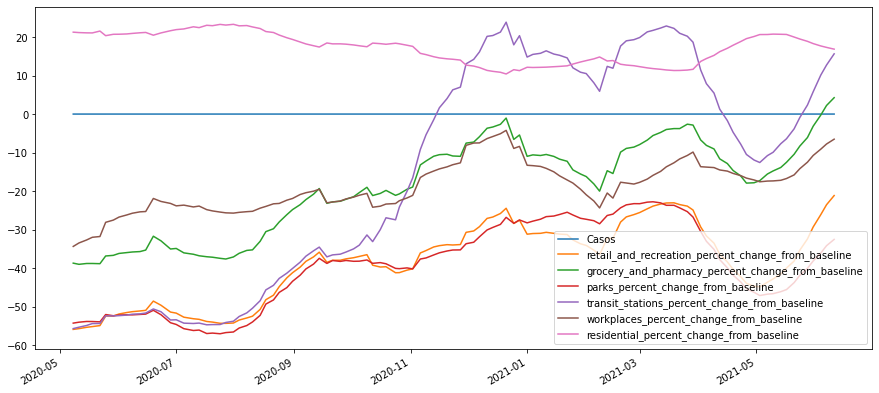

In [240]:
df_maule.rolling(14).mean().plot(figsize=(15,7))

In [241]:
y=df_maule['Casos'].rolling(14).mean().dropna().values
X=df_maule[df_maule.columns.difference(['Casos'])].rolling(14).mean().dropna().values


In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = ElasticNet(normalize=False,fit_intercept=True).fit(X_train, y_train)
y_hat=model.predict(X_test)
print('Coeficiente de Determinacion R2 Modelo Base: {0:0.2f}'.format(reg.score(X_test,y_test)))

Coeficiente de Determinacion R2 Modelo Base: -0.00


In [250]:
train_poly(X,y,p=8,interaction=True)

Coeficiente de Determinacion R2 Polinomio (2) : -0.00
MAE Polinomio (2) : 0.00
% Varianza Explicada  Polinomio (2) : -0.00
-----------------------------------------------------
Coeficiente de Determinacion R2 Polinomio (3) : 0.64
MAE Polinomio (3) : 0.00
% Varianza Explicada  Polinomio (3) : 0.64
-----------------------------------------------------
Coeficiente de Determinacion R2 Polinomio (4) : 0.86
MAE Polinomio (4) : 0.00
% Varianza Explicada  Polinomio (4) : 0.86
-----------------------------------------------------
Coeficiente de Determinacion R2 Polinomio (5) : 0.86
MAE Polinomio (5) : 0.00
% Varianza Explicada  Polinomio (5) : 0.86
-----------------------------------------------------
Coeficiente de Determinacion R2 Polinomio (6) : 0.86
MAE Polinomio (6) : 0.00
% Varianza Explicada  Polinomio (6) : 0.86
-----------------------------------------------------
Coeficiente de Determinacion R2 Polinomio (7) : 0.86
MAE Polinomio (7) : 0.00
% Varianza Explicada  Polinomio (7) : 0.86
--

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9531305664057907e-06, tolerance: 2.09790506383801e-09
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.091974147134578e-06, tolerance: 2.09790506383801e-09
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1081574800295636e-06, tolerance: 2.09790506383801e-09
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

In [246]:
model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}